In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parsing simulation history files
In the `simulate/LOGS` directory, all of the simulation output files are stored.

The first five lines are not needed, so we will skip them.
The sixth line is the header, which contains the column names.
The last line is the latest output, which contains the final values.

In [47]:
glob = Path('simulate/LOGS/').rglob('history_*.data')

headers = ['source_id', 'radius', 'mass', 'age', 'y', 'z', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'core_radius', 'H','He3','He','C','N','O','Ne','Mg'] 
output = []

data = pd.read_csv('simulate/data.csv', dtype={'source_id': str})  # Source data

idx = 0
for file in glob:
    with open(file, 'r') as f:
        lines = f.readlines()

        # Skip the first five lines
        lines = lines[5:]
        header = lines[0]
        last_line = lines[-1]
        
        if last_line.strip() == '':
            last_line = lines[-2]  # -1 is just whitespace

        while header.count('  ') > 0:
            header = header.replace('  ', ' ')

        while last_line.count('  ') > 0:
            last_line = last_line.replace('  ', ' ')

        header = header.strip()
        last_line = last_line.strip()

        header = header.split()
        last_line = last_line.split()
        df = pd.DataFrame([last_line], columns=header)
        row = data.iloc[idx]
        
        core_radius = 0
        
        for i in range(1, 10):
            burn_type = int(df[f'burn_relr_type_{i}'].iloc[-1])
            val = float(df[f'burn_relr_top_{i}'].iloc[-1])
            if burn_type != -9999 and val != 1 and val > 0:
                core_radius = df[f'burn_relr_top_{i}'].iloc[-1]

        core_radius = float(core_radius) * row['radius'] * 6.96e10 # Convert RSun to cm

        dat = [row['source_id'], row['radius'], row['mass'], row['age'], row['y'], row['z'],
               float(df['log_cntr_P'].iloc[-1]), float(df['log_cntr_Rho'].iloc[-1]), float(df['log_cntr_T'].iloc[-1]), core_radius, float(df['center_h1'].iloc[-1]), float(df['center_he3'].iloc[-1]), float(df['center_he4'].iloc[-1]),
               float(df['center_c12'].iloc[-1]), float(df['center_n14'].iloc[-1]), float(df['center_o16'].iloc[-1]), float(df['center_ne20'].iloc[-1]), float(df['center_mg24'].iloc[-1])]
        output.append(dat)
        idx += 1

df = pd.DataFrame(output, columns=headers)
df.set_index('source_id', inplace=True)

In [48]:
past_data = ['sim_batch_500', 'sim_batch_1500']
exists = 0
for batch in past_data:
    glob = Path(f'simulate/{batch}/').rglob('history_*.data')
    
    output = []
    
    star_sources = pd.read_csv(f'simulate/{batch}/data.csv', dtype={'source_id': str})
    
    idx = 0
    for file in glob:
        with open(file, 'r') as f:
            lines = f.readlines()
    
            # Skip the first five lines
            lines = lines[5:]
            header = lines[0]
            last_line = lines[-1]
            
            if last_line.strip() == '':
                last_line = lines[-2]  # -1 is just whitespace
    
            while header.count('  ') > 0:
                header = header.replace('  ', ' ')
    
            while last_line.count('  ') > 0:
                last_line = last_line.replace('  ', ' ')
    
            header = header.strip()
            last_line = last_line.strip()
    
            header = header.split()
            last_line = last_line.split()
            sim_results = pd.DataFrame([last_line], columns=header)
            row = star_sources.iloc[idx]
            
            core_radius = 0
            
            for i in range(1, 10):
                burn_type = int(sim_results[f'burn_relr_type_{i}'].iloc[-1])
                val = float(sim_results[f'burn_relr_top_{i}'].iloc[-1])
                if burn_type != -9999 and val != 1 and val > 0:
                    core_radius = sim_results[f'burn_relr_top_{i}'].iloc[-1]
    
            core_radius = float(core_radius) * row['radius'] * 6.96e10 # Convert RSun to cm
    
            dat = [row['radius'], row['mass'], row['age'], row['y'], row['z'],
                   float(sim_results['log_cntr_P'].iloc[-1]), float(sim_results['log_cntr_Rho'].iloc[-1]), float(sim_results['log_cntr_T'].iloc[-1]), core_radius, float(sim_results['center_h1'].iloc[-1]), float(sim_results['center_he3'].iloc[-1]), float(sim_results['center_he4'].iloc[-1]),
                   float(sim_results['center_c12'].iloc[-1]), float(sim_results['center_n14'].iloc[-1]), float(sim_results['center_o16'].iloc[-1]), float(sim_results['center_ne20'].iloc[-1]), float(sim_results['center_mg24'].iloc[-1])]
            
            if row['source_id'] in df.index:
                exists += 1
            
            df.loc[row['source_id']] = dat
            idx += 1

76

In [49]:
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,He3,He,C,N,O,Ne,Mg
source_id,,,,,,,,,,,,,,,,,
2106822131756839808,1.6064,1.294340,3.002109e+09,0.281930,0.018395,17.501250,2.380545,7.265867,2.051037e+10,0.085921,1.196085e-07,0.892322,0.000052,0.009962,0.005029,0.002271,0.004442
1304949779086279040,1.2402,1.109524,4.443443e+09,0.285753,0.020215,19.678953,4.153402,7.603358,3.597770e+09,0.000000,0.000000e+00,0.979650,0.000110,0.012819,0.000991,0.002176,0.004254
1467947017783706496,1.3236,1.167186,3.686911e+09,0.283830,0.019300,21.553254,5.438647,7.625120,1.976577e+08,0.000000,0.000000e+00,0.975591,0.000119,0.014805,0.001798,0.002601,0.005086
4656164360442701312,2.2996,1.547226,2.066022e+09,0.284734,0.019730,17.276836,1.986825,7.191186,3.390876e+10,0.612102,1.890534e-05,0.368324,0.000018,0.004901,0.008771,0.001984,0.003880
1467585518976535296,1.2681,1.241795,1.227007e+09,0.287069,0.020842,20.527841,4.784488,7.526560,2.277479e+09,0.000000,0.000000e+00,0.977265,0.000103,0.013716,0.001760,0.002421,0.004735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573524463718752128,1.4515,1.364354,1.750905e+09,0.287141,0.020877,17.392965,2.228490,7.194846,2.058748e+10,0.297216,6.364930e-06,0.682912,0.000021,0.005391,0.008479,0.002021,0.003953
4774254417528068096,1.7128,1.371215,2.469076e+09,0.284840,0.019781,17.136127,1.930723,7.086561,2.683845e+10,0.668158,8.883209e-05,0.313193,0.000016,0.004522,0.008462,0.001881,0.003679
3638813807772213120,0.9663,0.955172,5.441274e+09,0.283887,0.019327,20.313374,4.642204,7.519661,2.207356e+09,0.000000,0.000000e+00,0.981001,0.000079,0.011569,0.001366,0.002025,0.003959


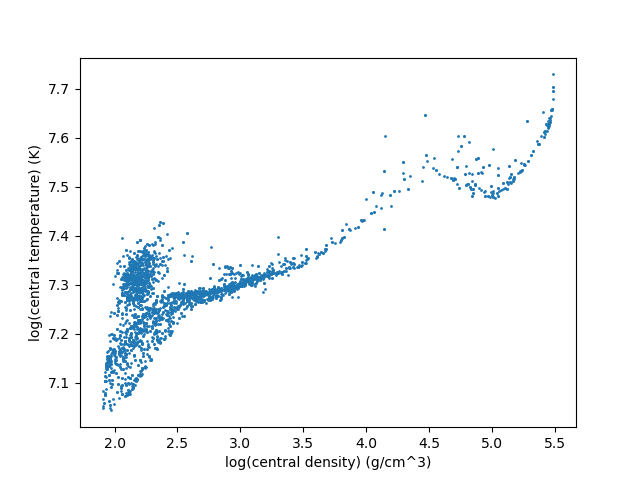

In [50]:
%matplotlib widget

fig, ax = plt.subplots()

ax.scatter(df['log_cntr_Rho'], df['log_cntr_T'], s=1)
ax.set_xlabel('log(central density) (g/cm^3)')
ax.set_ylabel('log(central temperature) (K)')

plt.show()

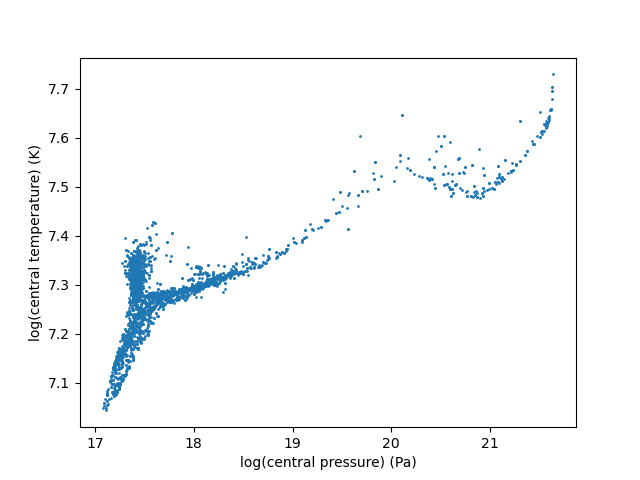

In [51]:
%matplotlib widget
fig, ax = plt.subplots()

ax.scatter(df['log_cntr_P'], df['log_cntr_T'], s=1)
ax.set_xlabel('log(central pressure) (Pa)')
ax.set_ylabel('log(central temperature) (K)')

plt.show()

## 3D plot

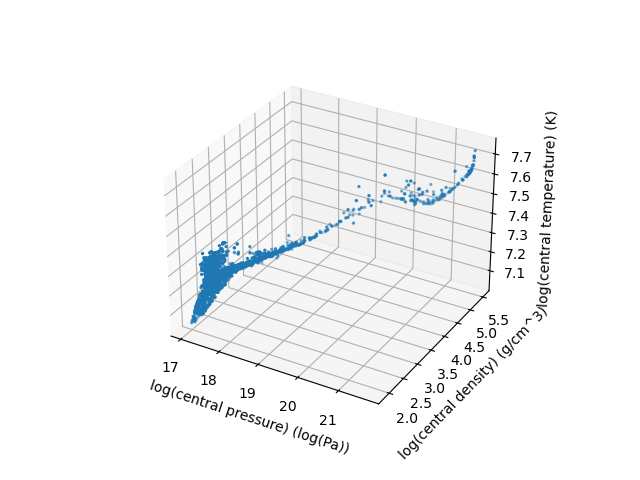

In [52]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['log_cntr_P'], df['log_cntr_Rho'], df['log_cntr_T'], s=2)
ax.set_xlabel('log(central pressure) (log(Pa))')
ax.set_ylabel('log(central density) (g/cm^3)')
ax.set_zlabel('log(central temperature) (K)')

plt.show()

## Process stellar core data
We need to determine the gravitational energy per atom of the stellar core as well as the thermal energy per atom.

For this, we will obviously need the number of atoms.
We have mass fracs for the core as well as the core radius (as a fraction of the star's radius) and the density.
With these, we can calculate the number of atoms in the core.

### First, we need the various masses of the elements

In [55]:
HYDROGEN_MASS = 1.00784
HELIUM_3_MASS = 3.016029
HELIUM_MASS = 4.002602
CARBON_MASS = 12.011
NITROGEN_MASS = 14.0067
OXYGEN_MASS = 15.999
NEON_MASS = 20.1797
SODIUM_MASS = 22.989769
MAGNESIUM_MASS = 24.305
ALUMINUM_MASS = 26.981539
SILICON_MASS = 28.0855
PHOSPHORUS_MASS = 30.973762 
SUlFUR_MASS = 32.065
POTASSIUM_MASS = 39.0983
CALCIUM_MASS = 40.078
TITANIUM_MASS = 47.867
CHROMIUM_MASS = 51.9961
MANGANESE_MASS = 54.938044
IRON_MASS = 55.845
NICKEL_MASS = 58.6934

masses = {
    'H': HYDROGEN_MASS,
    'He3': HELIUM_MASS,
    'He': HELIUM_MASS,
    'C': CARBON_MASS,
    'N': NITROGEN_MASS,
    'O': OXYGEN_MASS,
    'Ne': NEON_MASS,
    'Na': SODIUM_MASS,
    'Mg': MAGNESIUM_MASS,
    'Al': ALUMINUM_MASS,
    'Si': SILICON_MASS,
    'P': PHOSPHORUS_MASS,
    'S': SUlFUR_MASS,
    'K': POTASSIUM_MASS,
    'Ca': CALCIUM_MASS,
    'Ti': TITANIUM_MASS,
    'Cr': CHROMIUM_MASS,
    'Mn': MANGANESE_MASS,
    'Fe': IRON_MASS,
    'Ni': NICKEL_MASS,
}

SPECTROSCOPY_ATOMS = ['C', 'O', 'N', 'Ne', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Ni']

ATOMIC_UNIT = 1.6605402e-24  # gram

G = 6.67430e-11  # Gravitational constant
k = 1.380649e-23 * 6241509074461  # Boltzmann constant (MeV/K)

### Now we can run our calculations
We can use the following formula to calculate the number of atoms in the core:

![n = summation((M * X_Q)/m_Q)](imgs/latex_num_atoms.png)

Where:

*n* 	=	The number of atoms

*Q*	    =	The atom type, one of Hydrogen, Helium 3, Helium 4, Carbon, Nitrogen, Oxygen, Neon, or Magnesium

*M*	    =	Core mass obtained from density (ρ • V) in grams.

*X_Q*	=	Core mass fraction of the given atom Q

*m_Q*	=	Atomic mass in grams of the given atom Q


Using this quantity *n*, we can calculate the gravitational energy per atom of the stellar core as well as the thermal energy per atom.

For PAGE (Per-Atom Gravitational Energy), we will use the following formula:

![E_atom = -3/5 * G * M^2 / r * n](imgs/latex_energy_atom.png)

Where:

*E_atom*	=   	Energy per atom in Joules (for calculation purposes, this quantity was converted from Joules to Megaelectron-volts)

*G*     	=	    Gravitational constant

*M*        	=	    Core mass in grams

*r*   	    =	    Core radius in meters

*n*	        =	    Number of atoms in the core

Finally, we can calculate the average atomic mass of the core.

We will use the following formula:

![m_bar = sum(m_Q * X_Q)](imgs/latex_average_atomic_mass.png)

Where:

*m_bar*	    =   	Average atomic mass

*Q*     	=   	Type of atom, one of Hydrogen, Helium 3, Helium 4, Carbon, Nitrogen, Oxygen, Neon, or Magnesium

*m_Q*    	=	    Mass of the given atom Q

*X_Q*	    =	    Core mass fraction of the given atom Q

In [56]:
def get_core_atom_count(mass_fracs: dict[str, float], radius: float, density: float) -> int:
    """
    Calculate the number of atoms in a core based on mass fractions and density.
    :param mass_fracs: List of mass fractions for each element
    :param radius: Radius in cm
    :param density: Density in g/cm^3
    :return: 
    """
    atom_count = 0
    core_mass = density * (4/3 * np.pi * pow(radius, 3))
    for (atom, mass_frac) in mass_fracs.items():
        abs_mass_part = core_mass * mass_frac # Absolute mass of the element in grams
        atom_count += abs_mass_part / (masses[atom] * ATOMIC_UNIT)
    return atom_count

def get_core_atom_count_row(row):
    mass_fracs = {
        'H': row['H'],
        'He3': row['He3'],
        'He': row['He'],
        'C': row['C'],
        'N': row['N'],
        'O': row['O'],
        'Ne': row['Ne'],
        'Mg': row['Mg']
    }
    
    return get_core_atom_count(mass_fracs, row['core_radius'], 10 ** row['log_cntr_Rho'])

def get_average_atomic_mass(row):
    mass_fracs = {
        'H': row['H'],
        'He3': row['He3'],
        'He': row['He'],
        'C': row['C'],
        'N': row['N'],
        'O': row['O'],
        'Ne': row['Ne'],
        'Mg': row['Mg']
    }
    
    avg_atom_mass = 0
    for (atom, mass_frac) in mass_fracs.items():
        avg_atom_mass += mass_frac * masses[atom]
    
    return avg_atom_mass

df['core_mass'] = 10 ** df['log_cntr_Rho'] * (4/3 * np.pi * pow(df['core_radius'], 3)) # grams
df['core_atom_count'] = df.apply(get_core_atom_count_row, axis=1) # Dimensionless
df['per_atom_gravitational_energy'] = np.abs(-3 / 5 * G * pow(df['core_mass'] / 1000, 2) / (df['core_radius'] / 100)) / df['core_atom_count'] * 6241509074461 # MeV/atom
df['core_average_atomic_mass'] = df.apply(get_average_atomic_mass, axis=1) # AMU
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,...,He,C,N,O,Ne,Mg,core_mass,core_atom_count,per_atom_gravitational_energy,core_average_atomic_mass
source_id,,,,,,,,,,,,,,,,,,,,,
2106822131756839808,1.6064,1.294340,3.002109e+09,0.281930,0.018395,17.501250,2.380545,7.265867,2.051037e+10,0.085921,...,0.892322,0.000052,0.009962,0.005029,0.002271,0.004442,8.680683e+33,1.618018e+57,0.056754,4.032630
1304949779086279040,1.2402,1.109524,4.443443e+09,0.285753,0.020215,19.678953,4.153402,7.603358,3.597770e+09,0.000000,...,0.979650,0.000110,0.012819,0.000991,0.002176,0.004254,2.777093e+33,4.114487e+56,0.130220,4.265183
1467947017783706496,1.3236,1.167186,3.686911e+09,0.283830,0.019300,21.553254,5.438647,7.625120,1.976577e+08,0.000000,...,0.975591,0.000119,0.014805,0.001798,0.002601,0.005086,8.881315e+30,1.311742e+54,0.007604,4.318577
4656164360442701312,2.2996,1.547226,2.066022e+09,0.284734,0.019730,17.276836,1.986825,7.191186,3.390876e+10,0.612102,...,0.368324,0.000018,0.004901,0.008771,0.001984,0.003880,1.584344e+34,6.683796e+57,0.027683,2.434766
1467585518976535296,1.2681,1.241795,1.227007e+09,0.287069,0.020842,20.527841,4.784488,7.526560,2.277479e+09,0.000000,...,0.977265,0.000103,0.013716,0.001760,0.002421,0.004735,3.012591e+33,4.455190e+56,0.223566,4.297056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573524463718752128,1.4515,1.364354,1.750905e+09,0.287141,0.020877,17.392965,2.228490,7.194846,2.058748e+10,0.297216,...,0.682912,0.000021,0.005391,0.008479,0.002021,0.003953,6.185685e+33,1.738513e+57,0.026720,3.381280
4774254417528068096,1.7128,1.371215,2.469076e+09,0.284840,0.019781,17.136127,1.930723,7.086561,2.683845e+10,0.668158,...,0.313193,0.000016,0.004522,0.008462,0.001881,0.003679,6.903726e+33,3.086242e+57,0.014382,2.253628
3638813807772213120,0.9663,0.955172,5.441274e+09,0.283887,0.019327,20.313374,4.642204,7.519661,2.207356e+09,0.000000,...,0.981001,0.000079,0.011569,0.001366,0.002025,0.003959,1.976560e+33,2.931405e+56,0.150910,4.248509


## Calculate the thermal energy per atom
We can calculate the thermal energy per atom using the following formula:

![E_thermal = 3/2 * k_B * T](imgs/latex_energy_thermal.png)

Where:

*k_B* = Boltzmann constant

*T* = Temperature of the star in Kelvin

*E_thermal* = Thermal energy per atom in MeV

In [57]:
df['per_atom_thermal_energy'] = (3 / 2 * k * (10 ** df['log_cntr_T'])) # MeV/atom
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,...,C,N,O,Ne,Mg,core_mass,core_atom_count,per_atom_gravitational_energy,core_average_atomic_mass,per_atom_thermal_energy
source_id,,,,,,,,,,,,,,,,,,,,,
2106822131756839808,1.6064,1.294340,3.002109e+09,0.281930,0.018395,17.501250,2.380545,7.265867,2.051037e+10,0.085921,...,0.000052,0.009962,0.005029,0.002271,0.004442,8.680683e+33,1.618018e+57,0.056754,4.032630,0.002384
1304949779086279040,1.2402,1.109524,4.443443e+09,0.285753,0.020215,19.678953,4.153402,7.603358,3.597770e+09,0.000000,...,0.000110,0.012819,0.000991,0.002176,0.004254,2.777093e+33,4.114487e+56,0.130220,4.265183,0.005186
1467947017783706496,1.3236,1.167186,3.686911e+09,0.283830,0.019300,21.553254,5.438647,7.625120,1.976577e+08,0.000000,...,0.000119,0.014805,0.001798,0.002601,0.005086,8.881315e+30,1.311742e+54,0.007604,4.318577,0.005452
4656164360442701312,2.2996,1.547226,2.066022e+09,0.284734,0.019730,17.276836,1.986825,7.191186,3.390876e+10,0.612102,...,0.000018,0.004901,0.008771,0.001984,0.003880,1.584344e+34,6.683796e+57,0.027683,2.434766,0.002007
1467585518976535296,1.2681,1.241795,1.227007e+09,0.287069,0.020842,20.527841,4.784488,7.526560,2.277479e+09,0.000000,...,0.000103,0.013716,0.001760,0.002421,0.004735,3.012591e+33,4.455190e+56,0.223566,4.297056,0.004345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573524463718752128,1.4515,1.364354,1.750905e+09,0.287141,0.020877,17.392965,2.228490,7.194846,2.058748e+10,0.297216,...,0.000021,0.005391,0.008479,0.002021,0.003953,6.185685e+33,1.738513e+57,0.026720,3.381280,0.002024
4774254417528068096,1.7128,1.371215,2.469076e+09,0.284840,0.019781,17.136127,1.930723,7.086561,2.683845e+10,0.668158,...,0.000016,0.004522,0.008462,0.001881,0.003679,6.903726e+33,3.086242e+57,0.014382,2.253628,0.001578
3638813807772213120,0.9663,0.955172,5.441274e+09,0.283887,0.019327,20.313374,4.642204,7.519661,2.207356e+09,0.000000,...,0.000079,0.011569,0.001366,0.002025,0.003959,1.976560e+33,2.931405e+56,0.150910,4.248509,0.004277


## Plotting the results

247


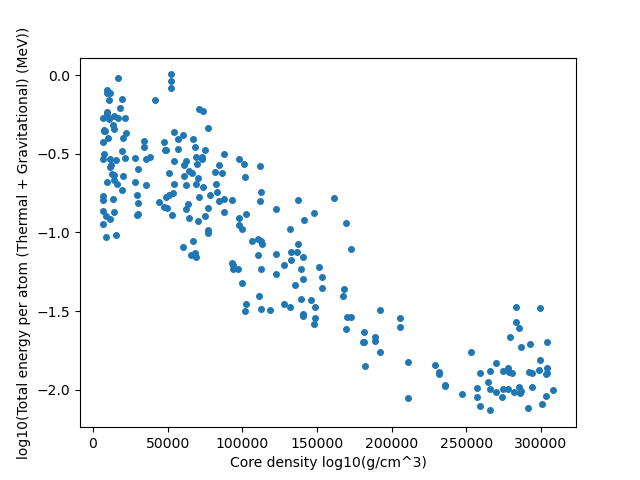

In [178]:
%matplotlib widget

data  = df
# data = data[data['core_average_atomic_mass'] > 4]
data = data[data['log_cntr_Rho'] > 3.8]

print(len(data))

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()
x = (data['per_atom_gravitational_energy'])
y = (data['core_average_atomic_mass'])
z = (data['per_atom_thermal_energy'])
ax.scatter(10 ** data['log_cntr_Rho'], np.log10(x + z), s=16)
# ax.set_xlabel('log(Gravitational energy per atom) (MeV)')
ax.set_xlabel('Core density log10(g/cm^3)')
ax.set_ylabel('log10(Total energy per atom (Thermal + Gravitational) (MeV))')

plt.show()

In [172]:
plt.close('all')